# Explorando Pixeis e o Sistema RGB

Sobre conceitos envolvidos na Computação Gráfica, vimos que podemos explorar imagens no "mundo" vetorial e matricial.

Embora a modelagem de objetos geométricos seja muito mais adequada no mundo vetorial, temos que lidar com imagens matriciais no momento de exibição no dispositivo de saída (como um monitor). Na prática, no fim do processo, é necessário realizar uma conversão matricial.

Nesse exercício, exploraremos um pouco o conceito de pixel, que é importante para o mundo matricial.

Vimos que pixel é uma amostra de um ponto de imagem e que o tamanho da amostra está associado com a qualidade da imagem.

Vamos carregar uma imagem e explorar um pouco o sistema RGB.

## Carregar as bibliotecas necessárias para o exercício

In [1]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display # to display images

## Fazer o download de uma imagem da internet

Tente trocar a URL por uma imagem de sua preferência.

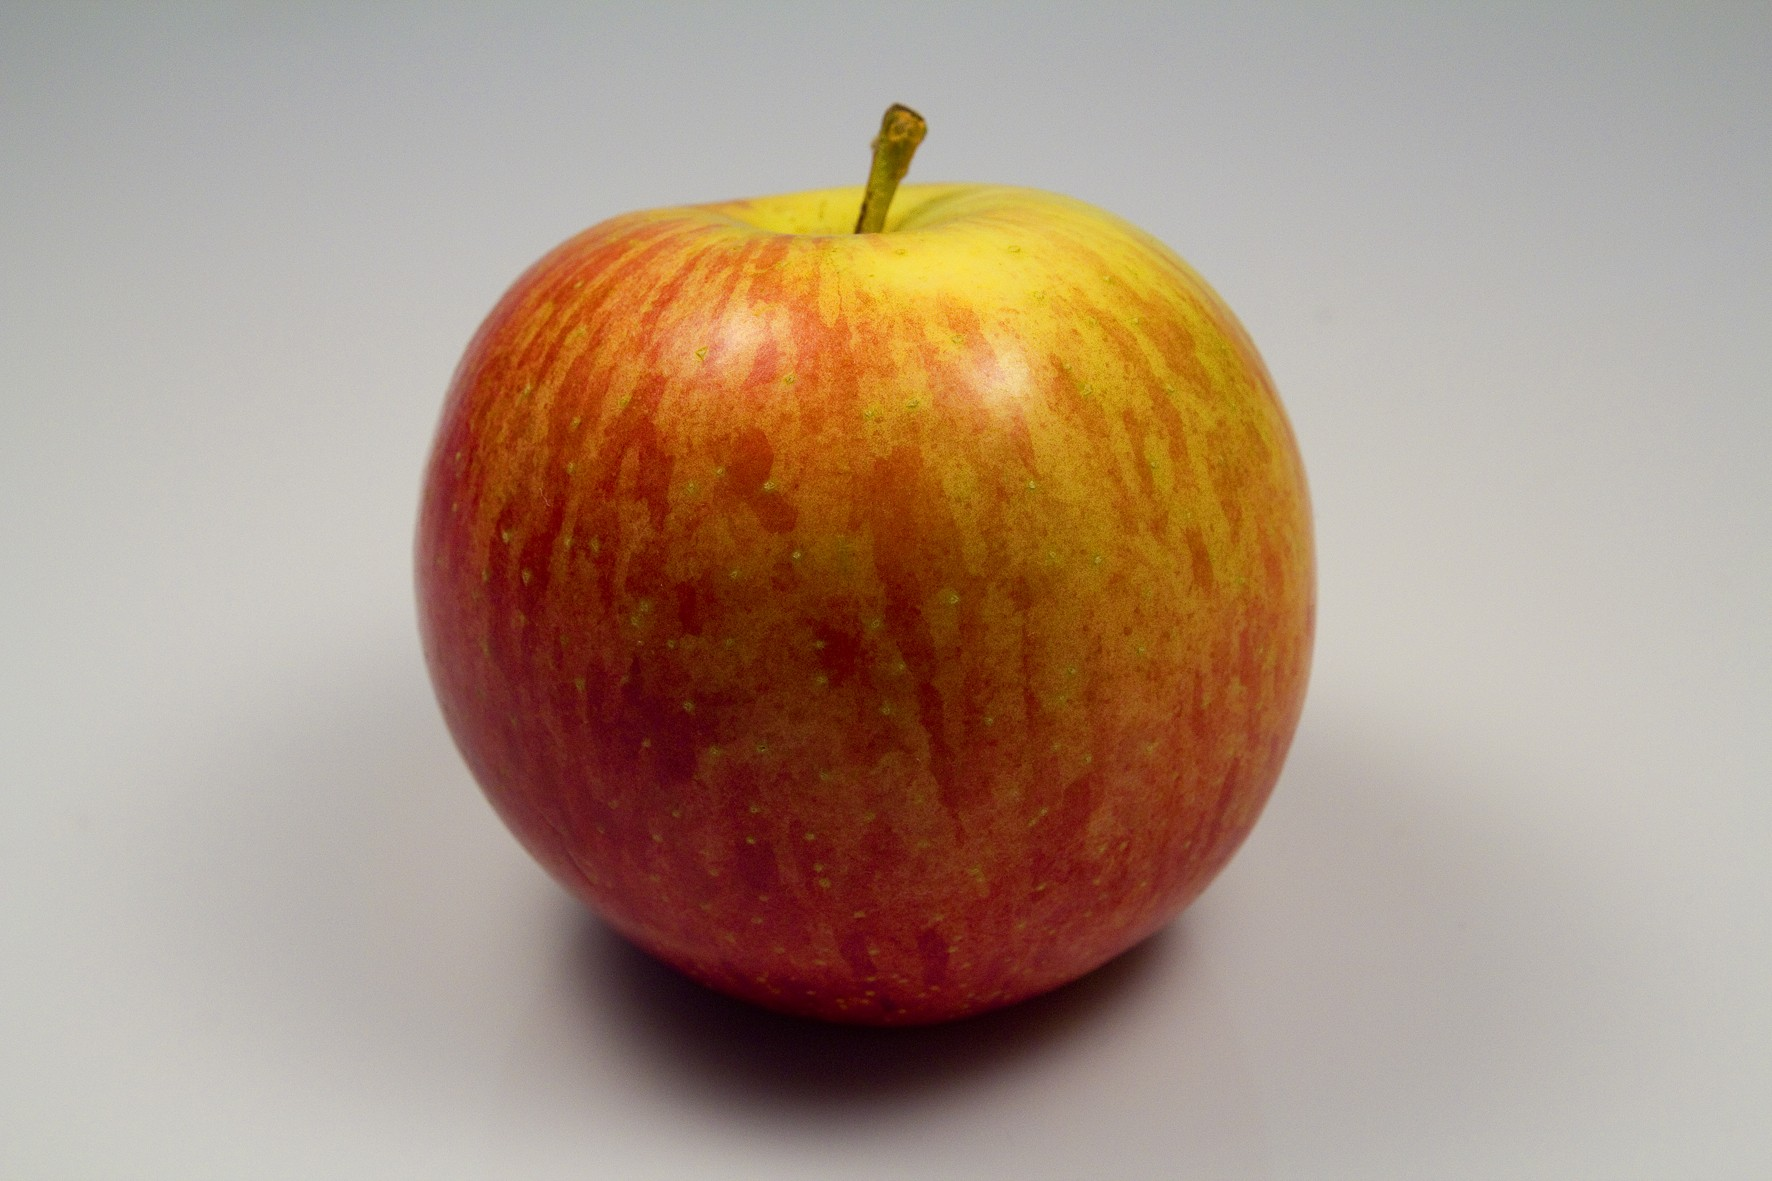

In [2]:
url_image = 'http://imagens.usp.br/wp-content/uploads/13072012frutasfotoMarcosSantos008.jpg'

# lendo a imagem
response = requests.get(url_image)

img = Image.open(BytesIO(response.content))

# exibindo a imagem
display(img)

## Explorando a matriz de pixels da imagem

Vimos que a imagem é composta por uma matriz de pixels. A dimensão dessa matriz representa a dimensão da imagem (largura e altura).

Cada pixel é composto pela tripla RGB (R=Red, G=Green, B=Blue). E cada componente possui uma escala de 0 a 255.

Desafio: percorrer a matriz de pixels e "clarear" o fundo da imagem. Para esse caso, o fundo da imagem é composto por pixels em tons de cinza. Toda vez que encontrarmos um pixel nesse tom, aplicaremos um fator de "clareamento". É importante lembrar que quanto mais próximo de 255, menor a intensidade da componente.

Regra de clareamento: se a componente R é maior do que 32, então clarear o pixel (tente alterar a regra e observe o resultado)

In [3]:
img = Image.open(BytesIO(response.content))
matrix_pixels = img.load() 
width = img.size[0]
height = img.size[1]

print(matrix_pixels[0,0])
print(matrix_pixels[0,1])
print(matrix_pixels[1,0])
print(matrix_pixels[width/2, height/2])

(147, 151, 152)
(149, 153, 154)
(150, 154, 155)
(108, 32, 8)


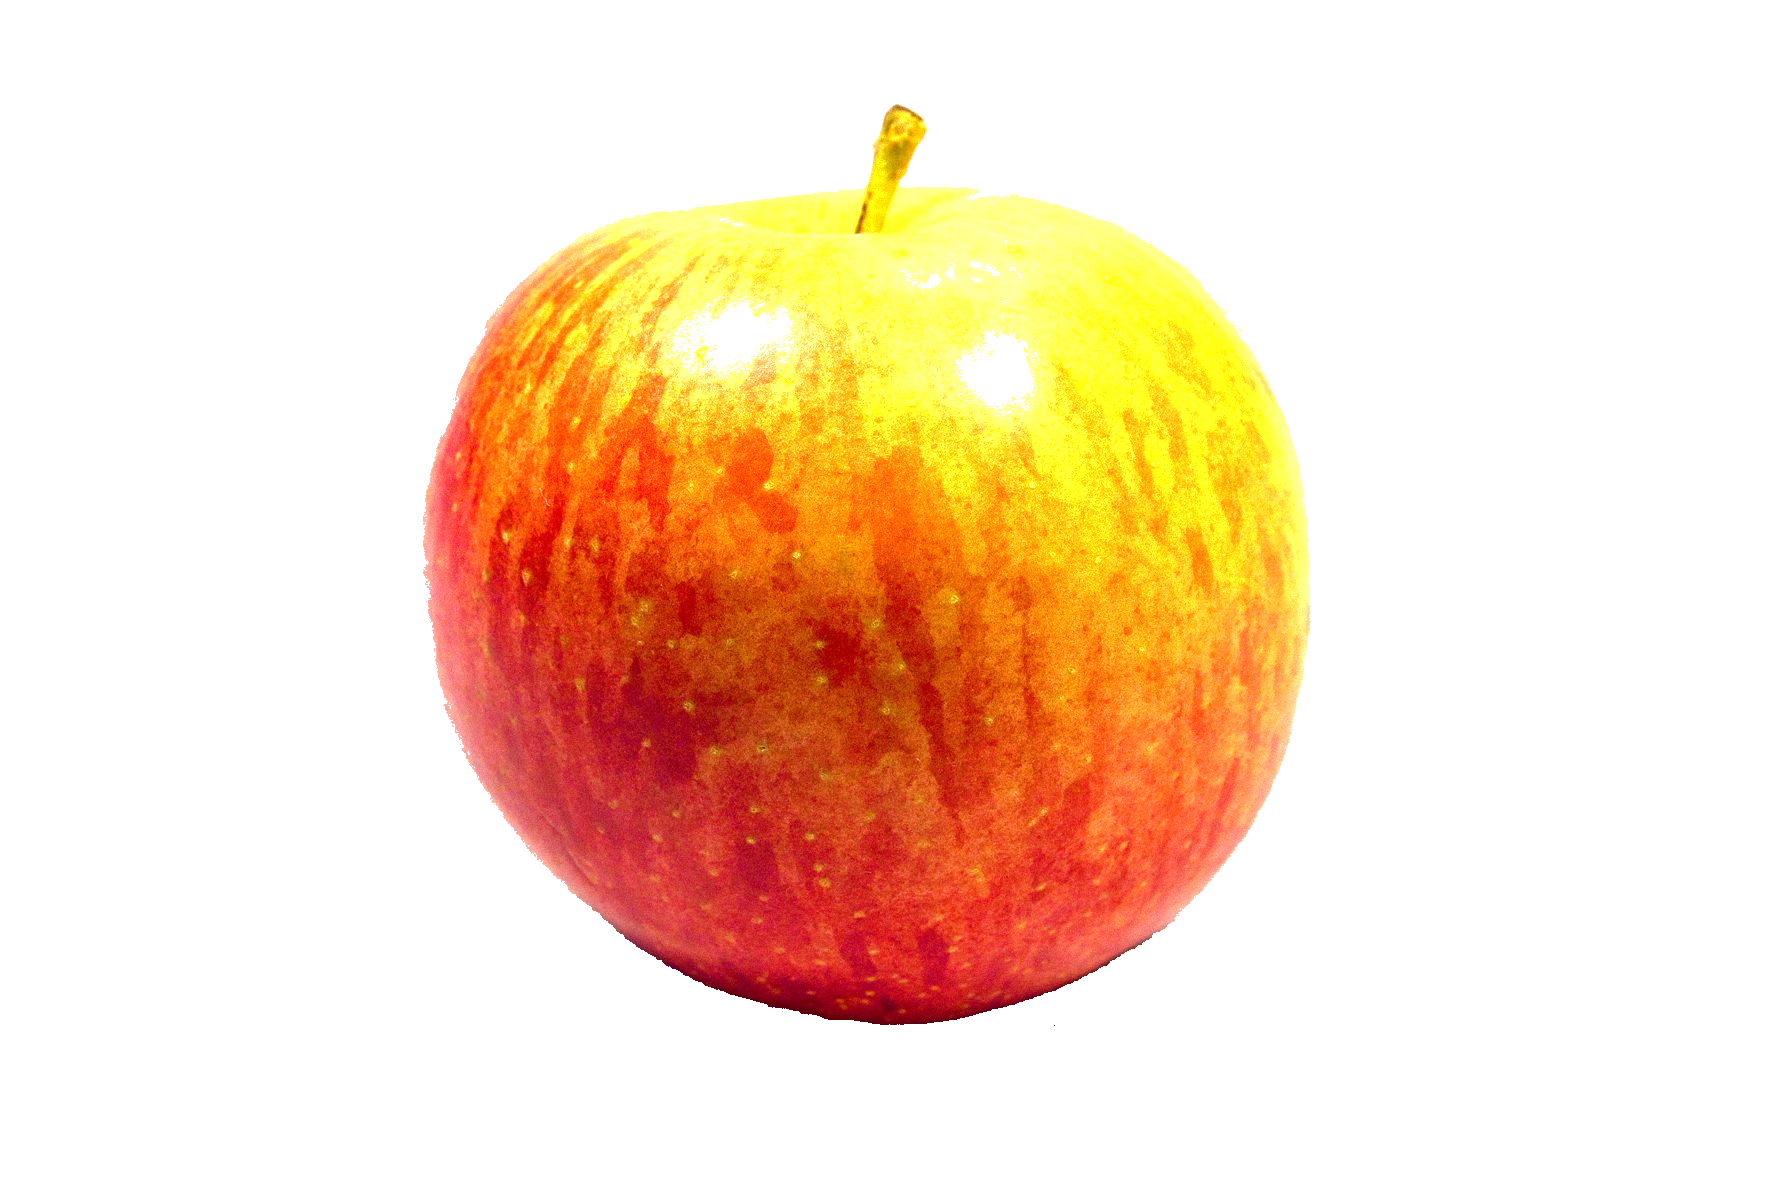

In [20]:
img = Image.open(BytesIO(response.content))

# informacoes da imagem
width = img.size[0]
height = img.size[1]

# obtem a matriz de pixels da imagem
matrix_pixels = img.load() 

def escala_cinza(R, G, B):
    media = (R + G + B) / 3

    return int(media)

def tentativa_remover_sombra(R, G, B):
    if abs(R - G) / 2 < 42 and abs(R - B) / 2 < 42 and abs(G - B) / 2 < 42:
        R = 255
        G = 255
        B = 255
    
    # if R > 47 and R < 220 and G > 79 and G < 220 and B > 79 and B < 220:
    #         R = 255
    #         G = 255
    #         B = 255
    # elif R < 128 and G < 128 and B < 128:
    #         R = 255
    #         G = 255
    #         B = 255
    # elif R > 220 and G > 220 and B > 220:
    #         R = 255
    #         G = 255
    #         B = 255
    
    return R, G, B


for i in range(width):
    for j in range(height):
        pixel = matrix_pixels[i,j] #tomamos o pixel na posicao i e j
        
        R = pixel[0]
        G = pixel[1]
        B = pixel[2]
        
        # Regra de clareamento: se a componente R é maior do que 32, então clarear o pixel (experimente ctiar outras)
        if R > 32:
            R = 2*R
            G = 2*G
            B = 2*B
        new_pixel = (R,G,B)
        matrix_pixels[i,j] = new_pixel

for i in range(width):
    for j in range(height):
        pixel = matrix_pixels[i,j] #tomamos o pixel na posicao i e j
        
        R = pixel[0]
        G = pixel[1]
        B = pixel[2]
        
        ### DESAFIO 01 ###

        new_R, new_G, new_B = tentativa_remover_sombra(R, G, B)

        R = new_R
        G = new_G
        B = new_B

        ### DESAFIO 02 ###

        # media = escala_cinza(R, G, B)
        
        # R = media
        # G = media
        # B = media

        new_pixel = (R,G,B)
        matrix_pixels[i,j] = new_pixel

# exibindo a imagem
display(img)

## Resultado...

O resultado acima não ficou tão ruim, considerando que usamos uma regra tão simples. Tente melhorar a regra de clareamento.

## Desafios para casa.

1) Remover sombra da imagem

2) Pense no sistema RGB, pesquise e verifique como deixar a imagem em tons de cinza

3) Aplicando efeito Breaking Bad na imagem abaixo

* A série Breaking Bad é muito famosa por brincar com as cores, tanto dos personagens, como dos ambientes. Um bom exemplo é como os criadores retraram o México na série. Em todas as cenas que se passam no deserto mexicano, as cores das imagens são altamente "amareladas", para passar a sensação de calor.

_Dica: Esse efeito pode ser feito intensificando as cores vermelho e verde e diminuindo a cor azul dos pixels._

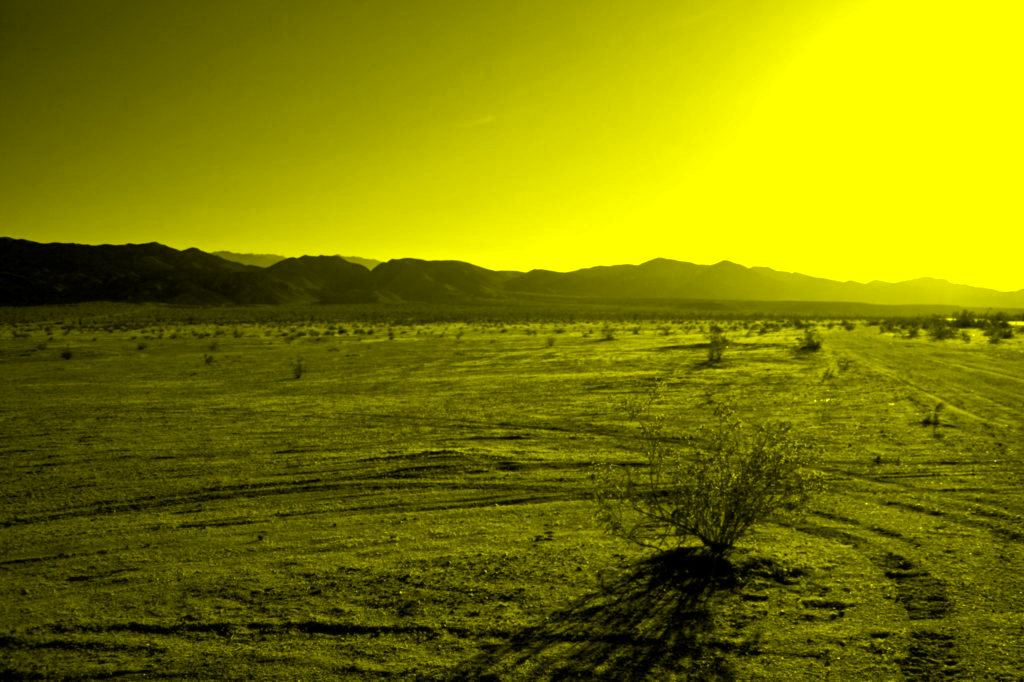

In [8]:
url_image2 = 'https://dialogochino.net/content/uploads/2018/10/mexicali-la-chinesca-e1546962067271-1024x682.jpg'

# lendo a imagem
response2 = requests.get(url_image2)

img2 = Image.open(BytesIO(response2.content))

# informacoes da imagem
width = img2.size[0]
height = img2.size[1]

def escala_amarelo(R, G, B):
  media = 0.8 *R + 0.6 * G / 2

  return int(media)

# obtem a matriz de pixels da imagem
matrix_pixels = img2.load()

for i in range(width):
  for j in range(height):
    pixel = matrix_pixels[i,j] #tomamos o pixel na posicao i e j
    
    R = pixel[0]
    G = pixel[1]
    B = pixel[2]
    
    media = escala_amarelo(R, G, B)

    R = media
    G = media
    B = 0        # como o tom de amarelo é apenas composto pelos valores de R e G, podemos deixar o valor B zerado

    new_pixel = (R,G,B)
    matrix_pixels[i,j] = new_pixel

# exibindo a imagem
display(img2)

**Deve enviar a tarefa via SIGAA fazendo o upload do notebook. Para isso, vá em _file> Download as> Notebook (.ipynb)_.**

Caso o tamanho do arquivo ultrapasse o limite do SIGAA:
* Adicione em uma pasta na núvem e submeta o link no sigaa (assegure que o link gerado é público) ou
* Salve como PDF e submeta no SIGAA (isso em último caso)

Dúvidas: maelso.bruno@ci.ufpb.br